In [1]:
import rasterio

tif_file = rasterio.open('../../HumanImpact/population/data/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0.tif')
ghs_data = tif_file.read()

In [4]:
import numpy as np 

print("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Tiff CRS EPSG:4326
Data shape (1, 21600, 43200)
Max value 459434.619140625
Min value 0.0


In [2]:
ghs_data[0][ghs_data[0] < 0.0] = 0.0

In [5]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap

ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
im = plt.imread('../../Branding/globe.png')


In [ ]:

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
ax.axis('off')
plt.savefig("Outputs/raw1.png", dpi=1000, bbox_inches='tight')
plt.show()

In [7]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.8, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.0, 0.0, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')


plt.savefig("Outputs/raw2.png", dpi=1000, bbox_inches='tight')
plt.show()

In [8]:
import geopandas as gpd
import pandas as pd

df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
                                              'Italy', 'Denmark', 'Luxembourg',
                                              'Belgium', 'Switzerland', 'Ireland'])]
france = df.loc[df['ADMIN'] == 'France']
Polygons = list(france.iloc[0].geometry)
france.geometry = [Polygons[1]]

spain = df.loc[df['ADMIN'] == 'Spain']
Polygons = list(spain.iloc[0].geometry)
spain.geometry = [Polygons[2]]

netherlands = df.loc[df['ADMIN'] == 'Netherlands']
Polygons = list(netherlands.iloc[0].geometry)
netherlands.geometry = [Polygons[0]]


portugal = df.loc[df['ADMIN'] == 'Portugal']
Polygons = list(portugal.iloc[0].geometry)
portugal.geometry = [Polygons[0]]

western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])

<ipython-input-8-040fa32d5ae0>:9: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(france.iloc[0].geometry)
<ipython-input-8-040fa32d5ae0>:9: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(france.iloc[0].geometry)
C:\Users\AdamS\anaconda3\envs\analysis\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-8-040fa32

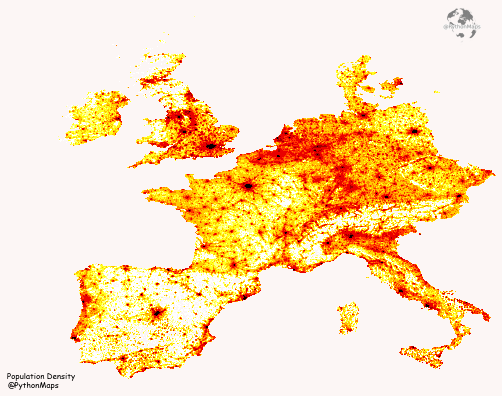

In [11]:
from shapely.geometry import mapping
from rasterio import mask as msk 

europe_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in western_europe.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(europe_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')

newax = fig.add_axes([0.66, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.0, 0.0, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')

plt.savefig("outputs/raw3.png", dpi=600, bbox_inches='tight')
plt.show()

In [12]:
usa = df.loc[df['ADMIN'] == 'United States of America']
Polygons = list(usa.iloc[0].geometry)
usa.geometry = [Polygons[0]]

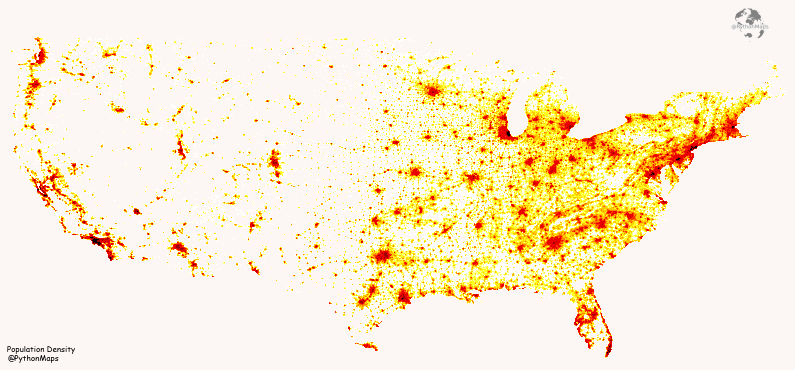

In [13]:
usa_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in usa.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(usa_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.8, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.0, 0.0, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw4.png", dpi=600, bbox_inches='tight')
plt.show()

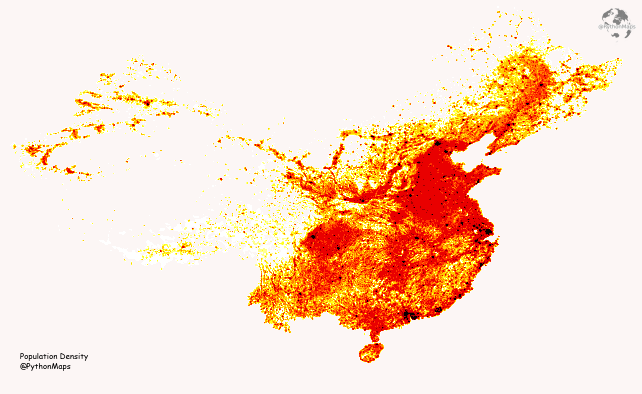

In [14]:
china = df.loc[df['ADMIN'] == 'China']

china_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in china.geometry.tolist()], crop=True, nodata=0)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(china_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.75, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

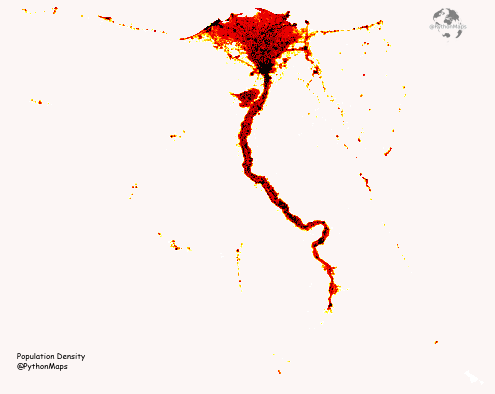

In [15]:
egypt = df.loc[df['ADMIN'] == 'Egypt']

egypt_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in egypt.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(egypt_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()

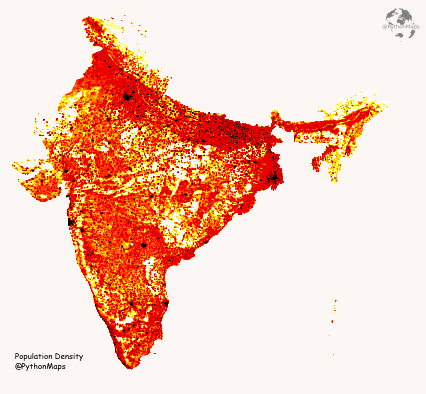

In [16]:
india = df.loc[df['ADMIN'] == 'India']

india_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in india.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(india_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw7.png", dpi=600, bbox_inches='tight')
plt.show()

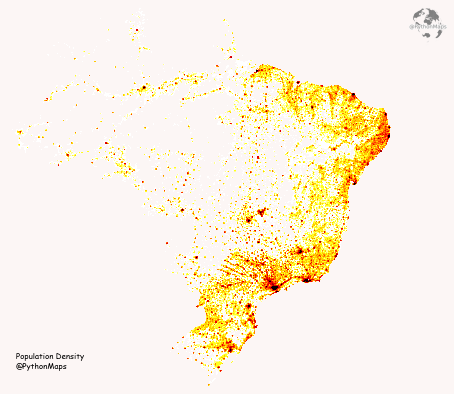

In [17]:
brazil = df.loc[df['ADMIN'] == 'Brazil']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()

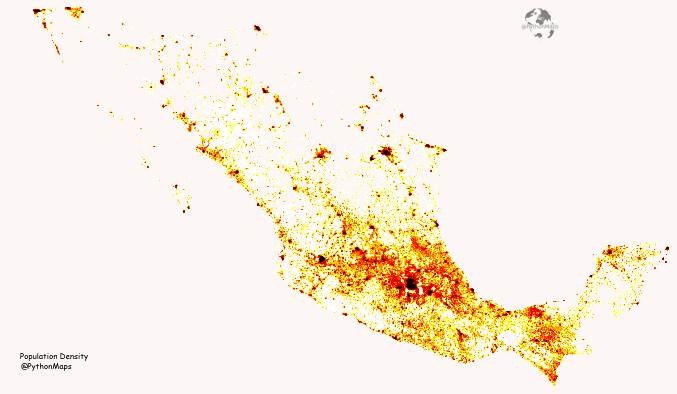

In [18]:
brazil = df.loc[df['ADMIN'] == 'Mexico']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw9.png", dpi=600, bbox_inches='tight')
plt.show()

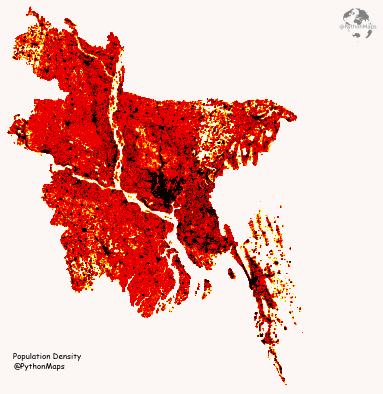

In [19]:
brazil = df.loc[df['ADMIN'] == 'Bangladesh']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()

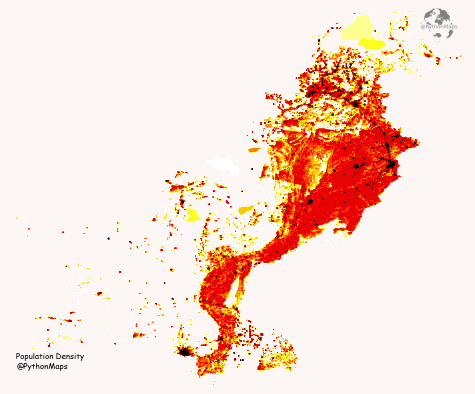

In [20]:
brazil = df.loc[df['ADMIN'] == 'Pakistan']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw8.png", dpi=600, bbox_inches='tight')
plt.show()

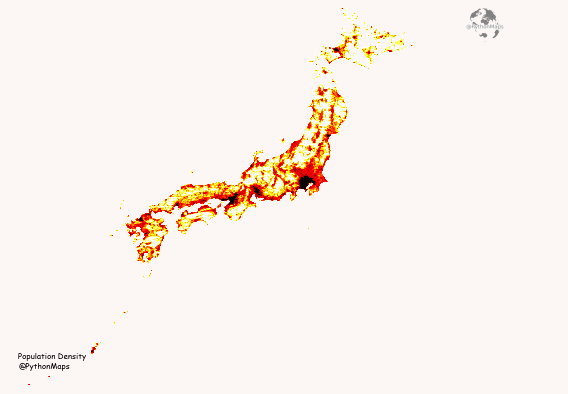

In [10]:
from shapely.geometry import mapping
from rasterio import mask as msk 


brazil = df.loc[df['ADMIN'] == 'Japan']

brazil_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in brazil.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(brazil_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
newax = fig.add_axes([0.65, 0.8, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.02, 0.05, "Population Density \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes,
              fontfamily='fantasy')
plt.savefig("outputs/raw9.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
X, Y = np.meshgrid(np.arange(egypt_array.shape[2]), np.arange(egypt_array.shape[1]))


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, egypt_array[0], rstride=1, cstride=1, cmap=plt.cm.hot)
ax.view_init(elev=50., azim=90)
ax.axis('off')
plt.savefig("outputs/raw3.png", dpi=600, bbox_inches='tight')
plt.show()
